<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W11_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder='/content/drive/MyDrive/train'

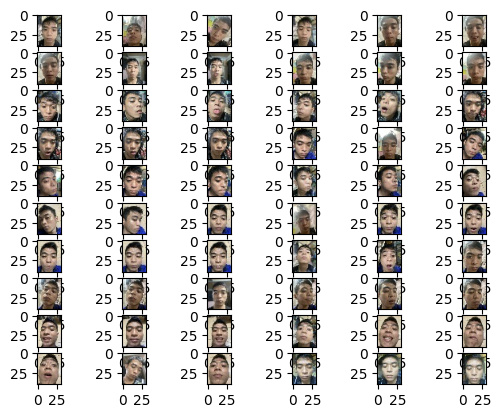

In [ ]:
for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + '/' + 'nhn'+str(i+1)+'.jpg'
  img = imread(filename)
  plt.imshow(img)

for i in range(60):
  plt.subplot(10,6,i+1)
  filename = folder + '/' + 'Thanh'+str(i+1)+'.jpg'
  img = imread(filename)
  plt.imshow(img)

In [ ]:
from os import listdir
import numpy as np
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array

In [ ]:
folder = '/content/drive/MyDrive/train/'
photos,labels = list(),list()

for file in listdir(folder):
  output = 0.0
  # neu file co 'nhn' 
  if file.startswith('nhn'):
    output = 1.0
  # neu file co 'Thanh'
  if file.startswith('Thanh'):
    output = 2.0

  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/pic_train/nhn_Thanh_photos.npy',photos)
save('/content/drive/MyDrive/pic_train/nhn_Thanh_labels.npy',labels)


(120, 200, 200, 3) (120,)


In [ ]:
import numpy as np

photos = np.load('/content/drive/MyDrive/pic_train/nhn_Thanh_photos.npy')
labels = np.load('/content/drive/MyDrive/pic_train/nhn_Thanh_labels.npy')


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(96, 200, 200, 3) (24, 200, 200, 3)
(96,) (24,)


In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(96, 200, 200, 3) (24, 200, 200, 3)
(96, 10) (24, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
])

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 128)     

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)


Epoch 1/10
2/2 [==============================] - 14s 3s/step - loss: 0.7103 - accuracy: 0.8542
Epoch 2/10
2/2 [==============================] - 10s 3s/step - loss: 0.0991 - accuracy: 0.9688
Epoch 3/10
2/2 [==============================] - 11s 4s/step - loss: 0.5076 - accuracy: 0.8125
Epoch 4/10
2/2 [==============================] - 8s 3s/step - loss: 0.1881 - accuracy: 0.9479
Epoch 5/10
2/2 [==============================] - 10s 3s/step - loss: 0.1499 - accuracy: 0.9583
Epoch 6/10
2/2 [==============================] - 10s 4s/step - loss: 0.0620 - accuracy: 0.9896
Epoch 7/10
2/2 [==============================] - 8s 3s/step - loss: 0.0209 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 10s 3s/step - loss: 0.0202 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 11s 5s/step - loss: 0.0109 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 8s 3s/step - loss: 0.0019 - accuracy: 1.0000
